# **seq2seq 모델 구현**

- G-Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
ROOT_PATH = '/gdrive/My Drive/Colab Notebooks/00_Lectures/NLP/data/'

- Copy "preprocess.py"

In [ ]:
!cp "/gdrive/My Drive/Colab Notebooks/00_Lectures/NLP/preprocess.py" ./

## 1. 전처리

In [1]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 609 kB/s 
     |████████████████████████████████| 465 kB 68.3 MB/s 


In [2]:
from preprocess import *

In [3]:
FILE_PATH = './ChatBotData.csv_short'
VOCAB_PATH = './vocabulary.txt'

In [4]:
inputs, outputs = load_data(FILE_PATH)

In [5]:
inputs

['가끔 궁금해',
 '가끔 뭐하는지 궁금해',
 '가끔은 혼자인게 좋다',
 '가난한 자의 설움',
 '가만 있어도 땀난다',
 '가상화폐 쫄딱 망함',
 '가스불 켜고 나갔어',
 '가스불 켜놓고 나온거 같아',
 '가스비 너무 많이 나왔다.',
 '가스비 비싼데 감기 걸리겠어',
 '남자친구 교회 데려가고 싶어',
 '남자친구 또 운동 갔어',
 '남자친구 생일인데 뭘 줄까',
 '남자친구 승진 선물로 뭐가 좋을까?',
 '남자친구 오늘 따라 훈훈해 보인다',
 '남자친구 오늘 좀 질린다.',
 '남자친구가 나 안 믿어줘',
 '남자친구가 너무 바빠',
 '남자친구가 너무 운동만 해',
 '남자친구가 너무 잘생겼어']

In [ ]:
outputs

['그 사람도 그럴 거예요.',
 '그 사람도 그럴 거예요.',
 '혼자를 즐기세요.',
 '돈은 다시 들어올 거예요.',
 '땀을 식혀주세요.',
 '어서 잊고 새출발 하세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '빨리 집에 돌아가서 끄고 나오세요.',
 '다음 달에는 더 절약해봐요.',
 '따뜻하게 사세요!',
 '마음을 열 때까지 설득해보세요.',
 '운동을 함께 해보세요.',
 '평소에 필요한 것 생각해보세요.',
 '평소에 필요했던 게 좋을 것 같아요.',
 '전생에 나라를 구하셨나요.',
 '결단은 빠를수록 좋아요.',
 '거짓말 적당히 하세요.',
 '너무 집착하지 마세요.',
 '운동을 함께 해보세요.',
 '전생에 나라를 구하셨나요.']

In [6]:
char2idx, idx2char, vocab_size = load_vocabulary(FILE_PATH, VOCAB_PATH, tokenize_as_morph=False)

In [7]:
idx2char

{0: '<PAD>',
 1: '<SOS>',
 2: '<END>',
 3: '<UNK>',
 4: '교회',
 5: '질린다',
 6: '뭘',
 7: '승진',
 8: '땀을',
 9: '바빠',
 10: '나오세요',
 11: '좋아요',
 12: '게',
 13: '마음을',
 14: '갔어',
 15: '켜고',
 16: '다음',
 17: '그',
 18: '너무',
 19: '평소에',
 20: '돌아가서',
 21: '더',
 22: '따라',
 23: '생일인데',
 24: '같아요',
 25: '땀난다',
 26: '감기',
 27: '나갔어',
 28: '쫄딱',
 29: '잘생겼어',
 30: '안',
 31: '해보세요',
 32: '마세요',
 33: '거예요',
 34: '따뜻하게',
 35: '열',
 36: '운동만',
 37: '망함',
 38: '많이',
 39: '또',
 40: '좋을까',
 41: '전생에',
 42: '들어올',
 43: '해',
 44: '나',
 45: '보인다',
 46: '식혀주세요',
 47: '운동',
 48: '끄고',
 49: '돈은',
 50: '가끔은',
 51: '믿어줘',
 52: '좀',
 53: '잊고',
 54: '가상화폐',
 55: '남자친구가',
 56: '있어도',
 57: '싶어',
 58: '가난한',
 59: '줄까',
 60: '혼자를',
 61: '하세요',
 62: '훈훈해',
 63: '나온거',
 64: '걸리겠어',
 65: '데려가고',
 66: '운동을',
 67: '뭐하는지',
 68: '그럴',
 69: '가만',
 70: '선물로',
 71: '다시',
 72: '같아',
 73: '때까지',
 74: '즐기세요',
 75: '구하셨나요',
 76: '혼자인게',
 77: '켜놓고',
 78: '필요한',
 79: '자의',
 80: '나왔다',
 81: '거짓말',
 82: '집에',
 83: '것',
 84: '좋다',
 85: '가끔',
 

In [8]:
index_inputs, input_seq_len = enc_processing(inputs, char2idx, tokenize_as_morph=False)
index_outputs, output_seq_len = dec_output_processing(outputs, char2idx, tokenize_as_morph=False)
index_targets = dec_target_processing(outputs, char2idx, tokenize_as_morph=False)

In [9]:
data_configs = {}
data_configs['char2idx'] = char2idx
data_configs['idx2char'] = idx2char
data_configs['vocab_size'] = vocab_size
data_configs['pad_symbol'] = PAD
data_configs['std_symbol'] = STD
data_configs['end_symbol'] = END
data_configs['unk_symbol'] = UNK

In [10]:
data_configs['vocab_size']

111

In [11]:
DATA_PATH = 'chatbot/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

In [12]:
import numpy as np

In [13]:
np.save(open(TRAIN_INPUTS, 'wb'), index_inputs)
np.save(open(TRAIN_OUTPUTS, 'wb'), index_outputs)
np.save(open(TRAIN_TARGETS, 'wb'), index_targets)

In [14]:
json.dump(data_configs, open(DATA_CONFIGS, 'w'))

## **2. 기본 작업**

### 2.1 패키지 불러오기

In [36]:
import tensorflow as tf
import numpy as np
import os

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

from preprocess import *

### 2.2 시각화 함수 구현

In [37]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

### 2.3 학습 데이터 경로 정의

In [42]:
DATA_PATH = R'chatbot/'
TRAIN_INPUTS = 'train_inputs.npy'
TRAIN_OUTPUTS = 'train_outputs.npy'
TRAIN_TARGETS = 'train_targets.npy'
DATA_CONFIGS = 'data_configs.json'

### 2.4 랜덤 시드 고정

In [39]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

### 2.5 파일 로드

In [44]:
index_inputs = np.load(open(TRAIN_INPUTS, 'rb'))
index_outputs = np.load(open(TRAIN_OUTPUTS , 'rb'))
index_targets = np.load(open(TRAIN_TARGETS , 'rb'))
prepro_configs = json.load(open(DATA_CONFIGS, 'r'))

In [45]:
# Show length
print(len(index_inputs),  len(index_outputs), len(index_targets))

20 20 20


## **3. 모델**

### 3.1 모델 만들기에 필요한 값 선언

In [46]:
MODEL_NAME = 'seq2seq_kor'
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCH = 30
UNITS = 1024
EMBEDDING_DIM = 256
VALIDATION_SPLIT = 0.1 

char2idx = prepro_configs['char2idx']
idx2char = prepro_configs['idx2char']
std_index = prepro_configs['std_symbol']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']

### 3.2 인코더 구현

In [47]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
        super(Encoder, self).__init__()
        self.batch_sz = batch_sz
        self.enc_units = enc_units
        self.vocab_size = vocab_size 
        self.embedding_dim = embedding_dim          
        
        self.embedding = tf.keras.layers.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = tf.keras.layers.GRU(self.enc_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

    def call(self, x, hidden):
        x = self.embedding(x)
        output, state = self.gru(x, initial_state = hidden)
        return output, state

    def initialize_hidden_state(self, inp):
        return tf.zeros((tf.shape(inp)[0], self.enc_units))

### 3.3 어텐션 (일단 그냥 사용하자)

In [48]:
class BahdanauAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, query, values):
        hidden_with_time_axis = tf.expand_dims(query, 1)

        score = self.V(tf.nn.tanh(
            self.W1(values) + self.W2(hidden_with_time_axis)))

        attention_weights = tf.nn.softmax(score, axis=1)

        context_vector = attention_weights * values
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

### 3.4 디코더

In [49]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
        super(Decoder, self).__init__()
        
        self.batch_sz = batch_sz
        self.dec_units = dec_units
        self.vocab_size = vocab_size 
        self.embedding_dim = embedding_dim  
        
        self.embedding = tf.keras.layers.Embedding(self.vocab_size, self.embedding_dim)
        self.gru = tf.keras.layers.GRU(self.dec_units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc = tf.keras.layers.Dense(self.vocab_size)

        self.attention = BahdanauAttention(self.dec_units)
        
    def call(self, x, hidden, enc_output):
        context_vector, attention_weights = self.attention(hidden, enc_output)

        x = self.embedding(x)

        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        output, state = self.gru(x)
        output = tf.reshape(output, (-1, output.shape[2]))
            
        x = self.fc(output)
        
        return x, state, attention_weights

In [50]:
optimizer = tf.keras.optimizers.Adam()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def loss(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)

def accuracy(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    mask = tf.expand_dims(tf.cast(mask, dtype=pred.dtype), axis=-1)
    pred *= mask    
    acc = train_accuracy(real, pred)

    return tf.reduce_mean(acc)

### 3.5 seq2seq 모델 구현

In [51]:
class seq2seq(tf.keras.Model):
    def __init__(self, vocab_size, embedding_dim, enc_units, dec_units, batch_sz, end_token_idx=2):    
        super(seq2seq, self).__init__()
        self.end_token_idx = end_token_idx
        self.encoder = Encoder(vocab_size, embedding_dim, enc_units, batch_sz) 
        self.decoder = Decoder(vocab_size, embedding_dim, dec_units, batch_sz) 

    def call(self, x):
        inp, tar = x
        
        enc_hidden = self.encoder.initialize_hidden_state(inp)
        enc_output, enc_hidden = self.encoder(inp, enc_hidden)

        dec_hidden = enc_hidden

        predict_tokens = list()
        for t in range(0, tar.shape[1]):
            dec_input = tf.dtypes.cast(tf.expand_dims(tar[:, t], 1), tf.float32) 
            predictions, dec_hidden, _ = self.decoder(dec_input, dec_hidden, enc_output)
            predict_tokens.append(tf.dtypes.cast(predictions, tf.float32))   
        return tf.stack(predict_tokens, axis=1)
    
    def inference(self, x):
        inp  = x

        enc_hidden = self.encoder.initialize_hidden_state(inp)
        enc_output, enc_hidden = self.encoder(inp, enc_hidden)

        dec_hidden = enc_hidden
        
        dec_input = tf.expand_dims([char2idx[std_index]], 1)
        
        predict_tokens = list()
        for t in range(0, MAX_SEQUENCE):
            predictions, dec_hidden, _ = self.decoder(dec_input, dec_hidden, enc_output)
            predict_token = tf.argmax(predictions[0])
            
            if predict_token == self.end_token_idx:
                break
            
            predict_tokens.append(predict_token)
            dec_input = tf.dtypes.cast(tf.expand_dims([predict_token], 0), tf.float32)   
            
        return tf.stack(predict_tokens, axis=0).numpy()

In [52]:
model = seq2seq(vocab_size, EMBEDDING_DIM, UNITS, UNITS, BATCH_SIZE, char2idx[end_index])
model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(1e-3), metrics=[accuracy])
#model.run_eagerly = True

## **4. 학습 진행**

In [53]:
PATH = MODEL_NAME

if not(os.path.isdir(PATH)):
  os.makedirs(os.path.join(PATH))

In [54]:
checkpoint_path = MODEL_NAME + '/weights.h5'

In [55]:
cp_callback = ModelCheckpoint(
  checkpoint_path, monitor='val_accuracy', verbose=1, save_best_olny=True, save_weights_only=True)

In [56]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)

In [57]:
history = model.fit([index_inputs, index_outputs], index_targets,
                    batch_size=BATCH_SIZE, epochs=EPOCH,
                    validation_split=VALIDATION_SPLIT,
                    callbacks=[earlystop_callback, cp_callback])

Epoch 1/30
9/9 [==============================] - ETA: 0s - loss: 0.8420 - accuracy: 0.8360
Epoch 1: saving model to seq2seq_kor/weights.h5
9/9 [==============================] - 49s 1s/step - loss: 0.8420 - accuracy: 0.8360 - val_loss: 0.6991 - val_accuracy: 0.8540
Epoch 2/30
9/9 [==============================] - ETA: 0s - loss: 0.7716 - accuracy: 0.8527
Epoch 2: saving model to seq2seq_kor/weights.h5
9/9 [==============================] - 1s 119ms/step - loss: 0.7716 - accuracy: 0.8527 - val_loss: 0.6100 - val_accuracy: 0.8560
Epoch 3/30
9/9 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.8572
Epoch 3: saving model to seq2seq_kor/weights.h5
9/9 [==============================] - 1s 115ms/step - loss: 0.6728 - accuracy: 0.8572 - val_loss: 0.5692 - val_accuracy: 0.8567
Epoch 4/30
9/9 [==============================] - ETA: 0s - loss: 0.6252 - accuracy: 0.8572
Epoch 4: saving model to seq2seq_kor/weights.h5
9/9 [==============================] - 1s 114ms/step - 

## **5. 결과**

### 5.1 결과 플롯

In [58]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string], '')
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

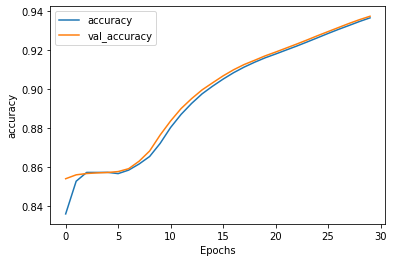

In [59]:
plot_graphs(history, 'accuracy')

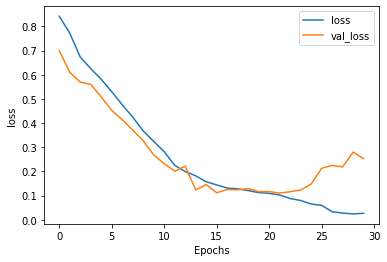

In [60]:
plot_graphs(history, 'loss')

### 5.2 결과 확인

In [61]:
SAVE_FILE_NM = "weights.h5"
model.load_weights(os.path.join(MODEL_NAME, SAVE_FILE_NM))

In [62]:
query = "남자친구 승진 선물로 뭐가 좋을까?"

test_index_inputs, _ = enc_processing([query], char2idx)
predict_tokens = model.inference(test_index_inputs)

In [63]:
print(predict_tokens)

[19 78 83 24]


In [64]:
print(' '.join([idx2char[str(t)] for t in predict_tokens]))

평소에 필요한 것 같아요
